In [3]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

beauty = pd.read_csv("beauty.csv")
print(beauty)

     tenured  profnumber  minority  age  beautyf2upper  beautyflowerdiv  \
0          0           1         1   36              6                5   
1          1           2         0   59              2                4   
2          1           3         0   51              5                5   
3          1           4         0   40              4                2   
4          0           5         0   31              9                7   
..       ...         ...       ...  ...            ...              ...   
458        0          93         0   32              9                6   
459        0          93         0   32              9                6   
460        0          94         1   42              7                3   
461        0          94         1   42              7                3   
462        0          94         1   42              7                3   

     beautyfupperdiv  beautym2upper  beautymlowerdiv  beautymupperdiv  ...  \
0                  7 

In [4]:
X = beauty['btystdave']
Y = beauty['courseevaluation']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
wyn = results.predict(X)

print(results.summary())
print(wyn)

                            OLS Regression Results                            
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           4.25e-05
Time:                        21:02:07   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0100      0.026    157.205      0.0

In [5]:
const_wsp = 4.0100
btystdave_wsp = 0.1330

btystdave = beauty['btystdave']

for row in beauty:
    grades_predicted = (const_wsp)+(btystdave_wsp)*btystdave
print('przewidziane')
print(grades_predicted)
print('rzeczywiste')
print(beauty['courseevaluation'])
print('średnia z różnicy')
print((grades_predicted-beauty['courseevaluation']).mean())
#porównianie przewidzianych i rzeczywistych

przewidziane
0      4.036808
1      3.900131
2      3.922176
3      3.908080
4      4.199052
         ...   
458    4.162025
459    4.162025
460    4.054163
461    4.054163
462    4.054163
Name: btystdave, Length: 463, dtype: float64
rzeczywiste
0      4.3
1      4.5
2      3.7
3      4.3
4      4.4
      ... 
458    3.2
459    4.3
460    3.3
461    3.2
462    4.1
Name: courseevaluation, Length: 463, dtype: float64
średnia z różnicy
-2.255887710602326e-05


wykres residułów dla btystdave i courseevaluation


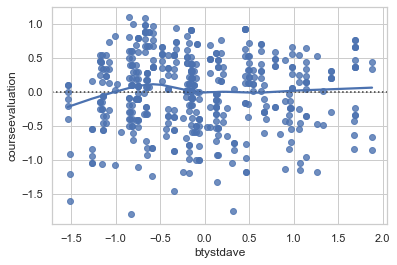

In [6]:
sns.set(style="whitegrid")

sns.residplot(beauty['btystdave'], beauty['courseevaluation'], lowess=True)
print('wykres residułów dla btystdave i courseevaluation')
plt.show()

In [7]:
X = beauty[['btystdave', 'btystdf2u', 'btystdfl', 'btystdfu', 'btystdm2u', 'btystdml', 'btystdmu']]
Y = beauty['courseevaluation']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
wyn = results.predict(X)
    
print(results.summary())
print(wyn)

                            OLS Regression Results                            
Dep. Variable:       courseevaluation   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.929
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           0.000355
Time:                        21:02:09   Log-Likelihood:                -370.16
No. Observations:                 463   AIC:                             756.3
Df Residuals:                     455   BIC:                             789.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0133      0.026    154.810      0.0

In [8]:
const_wsp = 4.0133
btystdave_wsp = -1.624e+04
btystdf2u_wsp = 2707.3179
btystdfl_wsp = 2707.2809
btystdfu_wsp = 2707.3710
btystdm2u_wsp = 2707.3325
btystdml_wsp = 2707.2221
btystdmu_wsp = 2707.3722

btystdave = beauty[['btystdave', 'btystdf2u', 'btystdfl', 'btystdfu', 'btystdm2u', 'btystdml', 'btystdmu']]

for row in beauty:
    predicted_courseevaluation = (const_wsp)+((btystdave_wsp)*btystdave)+((btystdf2u_wsp)*btystdave)+((btystdfl_wsp)*btystdave)+((btystdfu_wsp)*btystdave)+((btystdm2u_wsp)*btystdave)+((btystdml_wsp)*btystdave)+((btystdmu_wsp)*btystdave)

# przewidywane
print(predicted_courseevaluation)

     btystdave  btystdf2u  btystdfl   btystdfu  btystdm2u   btystdml  \
0     4.798724   5.140789  5.797950   7.425996   6.669672   0.506107   
1     0.794392  -2.296683  3.726875   1.764936  -0.397277   0.506107   
2     1.440248   3.281421  5.797950  -2.009102  -0.397277   0.506107   
3     1.027287   1.422054 -0.415276   3.651957  -2.752928   2.795524   
4     9.552103  10.718893  9.940103  11.200037   6.669672  11.953195   
..         ...        ...       ...        ...        ...        ...   
458   8.467289  10.718893  7.869025   5.538976   4.314022  11.953195   
459   8.467289  10.718893  7.869025   5.538976   4.314022  11.953195   
460   5.307169   7.000156  1.655799   9.313015   1.958373   5.084942   
461   5.307169   7.000156  1.655799   9.313015   1.958373   5.084942   
462   5.307169   7.000156  1.655799   9.313015   1.958373   5.084942   

      btystdmu  
0     3.251834  
1     1.462388  
2     1.462388  
3     1.462388  
4     6.830725  
..         ...  
458  10.409616  

wykres residułów dla btystdf2u i courseevaluation


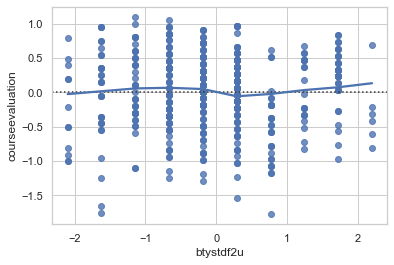

wykres residułów dla btystdfl i courseevaluation


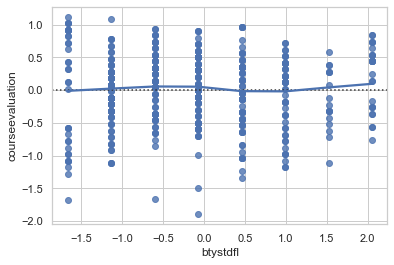

wykres residułów dla btystdfu i courseevaluation


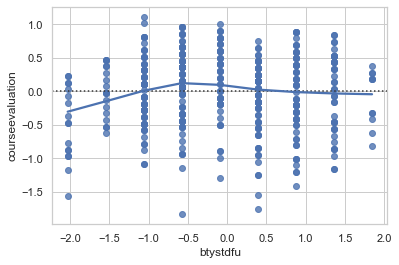

wykres residułów dla btystdm2u i courseevaluation


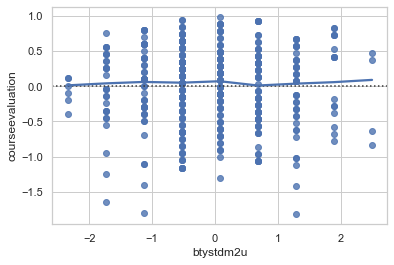

wykres residułów dla btystdml i courseevaluation


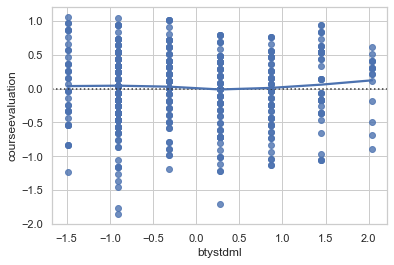

wykres residułów dla btystdmu i courseevaluation


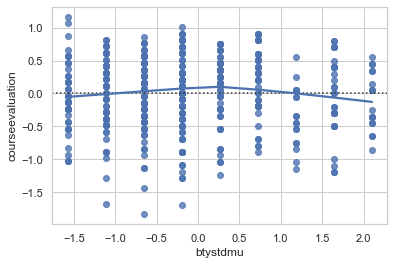

In [9]:
sns.residplot(beauty['btystdf2u'], beauty['courseevaluation'], lowess=True)
print('wykres residułów dla btystdf2u i courseevaluation')
plt.show()

sns.residplot(beauty['btystdfl'], beauty['courseevaluation'], lowess=True)
print('wykres residułów dla btystdfl i courseevaluation')
plt.show()

sns.residplot(beauty['btystdfu'], beauty['courseevaluation'], lowess=True)
print('wykres residułów dla btystdfu i courseevaluation')
plt.show()

sns.residplot(beauty['btystdm2u'], beauty['courseevaluation'], lowess=True)
print('wykres residułów dla btystdm2u i courseevaluation')
plt.show()

sns.residplot(beauty['btystdml'], beauty['courseevaluation'], lowess=True)
print('wykres residułów dla btystdml i courseevaluation')
plt.show()

sns.residplot(beauty['btystdmu'], beauty['courseevaluation'], lowess=True)
print('wykres residułów dla btystdmu i courseevaluation')
plt.show()